In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('bank_data.csv')
df.head()
df.isnull().any(axis=0)
#数据行信息完整，无NaN值

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [30]:
df.isnull().any(axis=1)
#数据列信息完整，无NaN值

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [4]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [98]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [109]:
from sklearn.cluster import KMeans

class BankMarketData():

    #探索数据
    def detectData(self,filePath):
        df = pd.read_csv('bank_data.csv',sep=";")
        df = df.fillna(0, inplace=True)

    #清洗数据以及数据抽取
    def clean_choose_Data(self,filePath):
        df = pd.read_csv(filePath)
        filter1 = df['job'] != 'admin.'
        filter2 = df['balance'] >0
        filters = filter1 & filter2
        df = df[filters]
        df[['job','marital','education','default','balance','housing','loan','contact','campaign','previous','duration','pdays','poutcome', 'deposit']].to_csv('bank_cleaned_choose.csv')
     #数据转换
    def transfrom_Data(self,filePath):
        df = pd.read_csv(filePath)
        df['job'].replace(['unemployed', 'student', 'retired', 'self-employed', 'housemaid', 'services', 'blue-collar', 'technician','management', 'entrepreneur', 'unknown'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 5], inplace=True)
        df['J'] = df['job']
        df['marital'].replace(['married','single','divorced'], [0,1,2], inplace=True)
        df['M'] = df['marital']
        df['education'].replace(['secondary', 'tertiary', 'primary', 'unknown'], [0,1,2,3], inplace = True)
        df['E'] = df['education']
        df['default'].replace(['yes','no'], [0,1], inplace = True)
        df['De'] = df['default']
        df['housing'].replace(['yes','no'],[0,1],inplace = True)
        df['H'] = df['housing']
        df['loan'].replace(['yes','no'],[0,1],inplace = True)
        df['L'] = df['loan']
        df['contact'].replace(['cellular', 'unknown', 'telephone'], [0,1,2], inplace = True)
        df['C'] = df['contact']
        df['Ca'] = df['campaign']
        df['Pr'] = df['previous']
        df['B'] = df['balance']
        df['D'] = df['duration']
        df['P'] = df['pdays']
        df['poutcome'].replace(['unknown','failure','success','other'],[0,1,2,0], inplace=True)
        df['PC'] = df['poutcome']
        df['deposit'].replace(['yes', 'no'], [0,1], inplace = True)
        df['Dp'] = df['deposit']
        df[['J','M','E', 'De','H','L', 'C','Ca','Pr','B','D','P','PC','Dp']].to_csv("bank_transform_data.csv")
          #数据标准化
    def standarData(self,filePath):
        df = pd.read_csv(filePath)
        df = (df - np.mean(df,axis=0))/np.std(df,axis=0)
        df[['J','M','E', 'De','H','L', 'C','Ca','Pr','B','D','P','PC','De']].to_csv("bank_standar_data.csv")
        	#将数据分类以及绘制雷达图
    def classifyData(self,filePath,k=14):
        df = pd.read_csv(filePath)
        kmeans = KMeans(k)
        kmeans.fit(df[['J','M','E', 'De','H','L', 'C','Ca','Pr','B','D','P','PC','De']])
        print(kmeans.cluster_centers_)
        print(kmeans.labels_)
        df['label'] = kmeans.labels_
        df.to_csv("ank_result_data.csv")
        coreData =pd.DataFrame(kmeans.cluster_centers_)
        coreData.to_csv("bank_center_data.csv")
                # 绘制雷达图
        # 1.组织数据
        # 构造X轴值
        xdata = np.linspace(0, 2* np.pi, k, endpoint=False)
        xdata = np.concatenate((xdata, [xdata[0]]))

        ydata1 = np.concatenate((coreData[0], [coreData[0][0]]))
        ydata2 = np.concatenate((coreData[1], [coreData[1][0]]))
        ydata3 = np.concatenate((coreData[2], [coreData[2][0]]))
        ydata4 = np.concatenate((coreData[3], [coreData[3][0]]))
        ydata5 = np.concatenate((coreData[4], [coreData[4][0]]))
        ydata6 = np.concatenate((coreData[5], [coreData[5][0]]))
        ydata7 = np.concatenate((coreData[6], [coreData[6][0]]))
        ydata8 = np.concatenate((coreData[7], [coreData[7][0]]))
        ydata9 = np.concatenate((coreData[8], [coreData[8][0]]))
        ydata10 = np.concatenate((coreData[9], [coreData[9][0]]))
        ydata11 = np.concatenate((coreData[10], [coreData[10][0]]))
        ydata12 = np.concatenate((coreData[11], [coreData[11][0]]))
        ydata13 = np.concatenate((coreData[12], [coreData[12][0]]))
        ydata14 = np.concatenate((coreData[13], [coreData[13][0]]))

        fig = plt.figure(figsize = (20,20))
        ax = fig.add_subplot(111, polar=True)
        ax.plot(xdata, ydata1, 'o--', linewidth=1, label='customer1')
        ax.plot(xdata, ydata2, 'o--', linewidth=1, label='customer2')
        ax.plot(xdata, ydata3, 'o--', linewidth=1, label='customer3')
        ax.plot(xdata, ydata4, 'o--', linewidth=1, label='customer4')
        ax.plot(xdata, ydata5, 'o--', linewidth=1, label='customer5')
        ax.plot(xdata, ydata6, 'o--', linewidth=1, label='customer6')
        ax.plot(xdata, ydata7, 'o--', linewidth=1, label='customer7')
        ax.plot(xdata, ydata8, 'o--', linewidth=1, label='customer8')
        ax.plot(xdata, ydata9, 'o--', linewidth=1, label='customer9')
        ax.plot(xdata, ydata10, 'o--', linewidth=1, label='customer10')
        ax.plot(xdata, ydata11, 'o--', linewidth=1, label='customer11', c = 'black')
        ax.plot(xdata, ydata12, 'o--', linewidth=1, label='customer12', c = 'indigo')
        ax.plot(xdata, ydata13, 'o--', linewidth=1, label='customer13', c = 'teal')
        ax.plot(xdata, ydata14, 'o--', linewidth=1, label='customer14', c = 'darkred')

        ax.set_thetagrids(xdata * 180 / np.pi, ['J','M','E', 'De','H','L', 'C','Ca','Pr','B','D','P','PC','De'])
        ax.set_rlim(-5, 7.5)
        plt.legend(loc='best', fontsize = 10)
        plt.savefig('rado.png', dpi = 400)
        plt.show()

[[ 2.06560552e-01 -5.00306410e-02 -1.66486138e-01  8.54609228e-02
  -6.88453044e-01  8.87386438e-02 -4.45115816e-01 -1.92481261e-01
   7.40661316e-01 -9.30697541e-02 -8.46562559e-02  2.52167263e+00
   9.11486851e-01  8.54609228e-02]
 [-1.83402523e+00  3.34097356e-01 -2.88257988e-01  8.54609228e-02
   6.02108461e-01  3.53530133e-01 -3.68978183e-01 -1.59086605e-01
  -2.50299469e-01 -5.41923421e-02 -8.74219081e-02 -3.48220900e-01
  -4.03095227e-01  8.54609228e-02]
 [ 1.83816254e-01  5.99980855e-02 -4.72263287e-02  8.54609228e-02
  -2.91078276e-01  2.34746786e-01  3.14593441e-02  5.14510916e-02
  -2.97117036e-01 -1.04321056e-03  2.64294404e+00 -3.78712303e-01
  -4.23784000e-01  8.54609228e-02]
 [ 3.06708976e-01 -3.37662502e-01 -5.87808770e-01  8.54609228e-02
  -1.11735761e+00  3.53530133e-01  1.91067860e-01 -1.06107827e-01
  -3.31723811e-01 -1.37918590e-01 -2.21031905e-01 -4.59029810e-01
  -4.64825749e-01  8.54609228e-02]
 [ 4.87657627e-01  1.82015927e+00  6.21968373e-02  8.54609228e-02
  

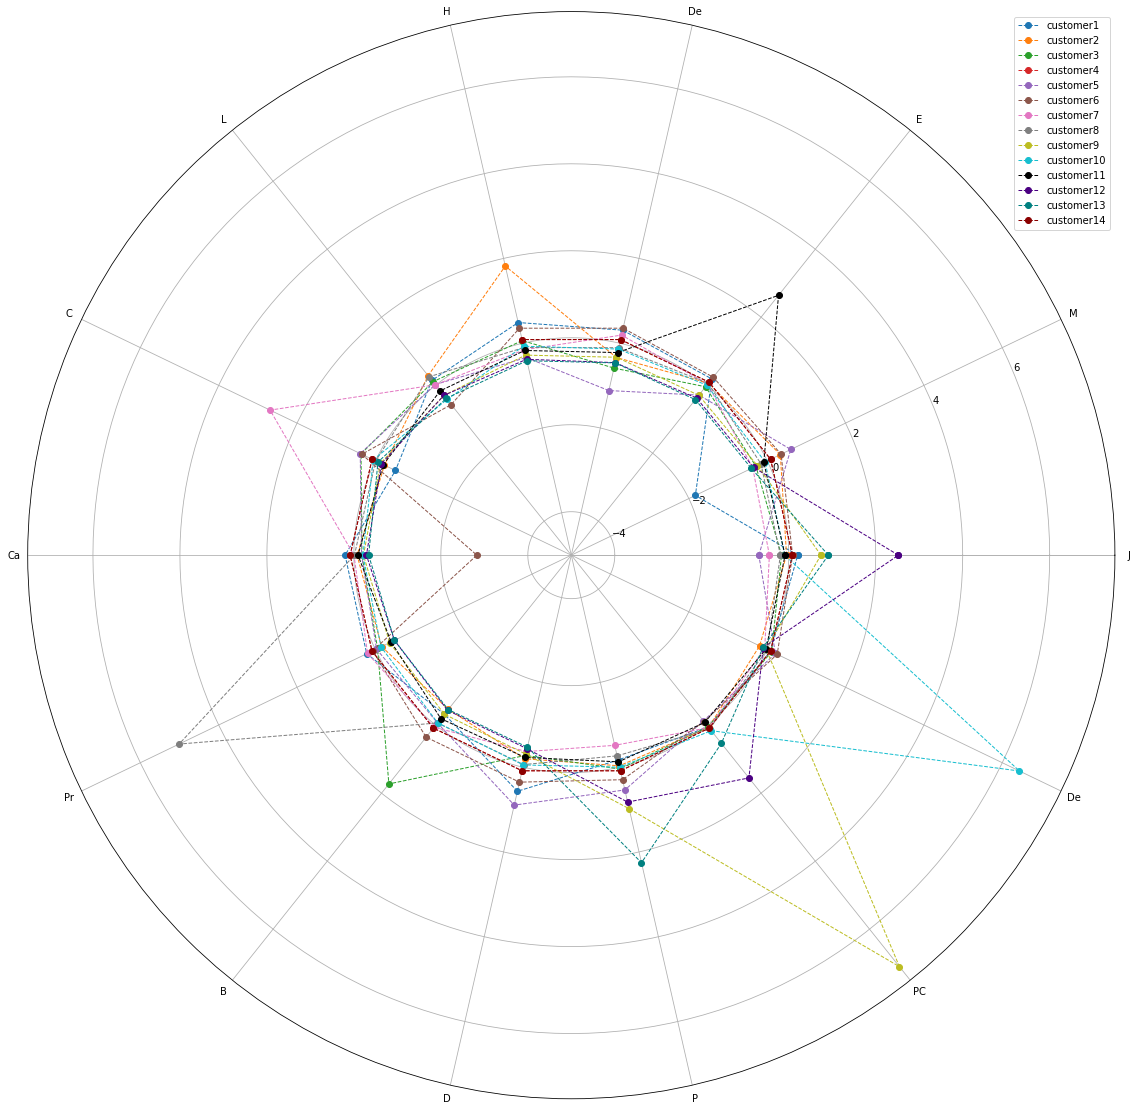

In [110]:
if __name__ == '__main__':
    ad = BankMarketData()
    ad.detectData("bank_data.csv")
    ad.clean_choose_Data("bank_data.csv")
    ad.transfrom_Data("bank_cleaned_choose.csv")
    ad.standarData("bank_transform_data.csv")
    ad.classifyData("bank_standar_data.csv",k=14)